In [1]:
import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt 
import json   as j 

# 
import seaborn as sns 
import folium  as f 

import warnings
warnings.filterwarnings('ignore')

print('numpy   version , ' , np.__version__)
print('pandnas version , ' , pd.__version__)

%matplotlib inline

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False    
    
import warnings
warnings.filterwarnings(action='ignore')    


numpy   version ,  1.24.3
pandnas version ,  1.5.3


In [78]:
mpgFrm = pd.read_excel('./data/mpg_visualization.xlsx' , 
                       index_col = 0)
mpgFrm.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [6]:
mpgFrm.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [13]:
mpgFrm['cyl'].unique()

array([4, 6, 8, 5], dtype=int64)

In [17]:
mpgFrm.shape

(234, 11)

In [18]:
mpgFrm.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


양적 자료(데이터)
- 요약정보에 집계가 되는 컬럼으로 관측된 값이 수치 형태의 속성
- box plot

질적 자료(데이터)
- 범주 또는 순서 형태의 속성을 가진 자료로 데이터의 분포를 확인해야하는 값들 
- bar plot

양적자료만 추출하여 서브셋 구축 - 


<Axes: >

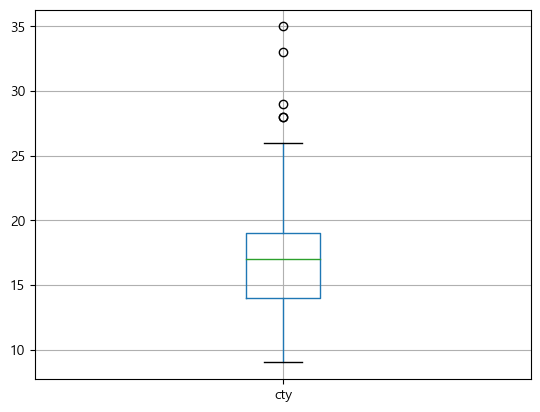

In [24]:
print('양적자료만 추출하여 서브셋 구축 - ') 
subset = mpgFrm.loc[ :  , ['displ', 'cyl' , 'cty' , 'hwy']]
# subset 
subset.boxplot(['cty'])

In [26]:
print('질적자료 - 분포 value_counts() ')
print('제조사의 분포를 확인하고 싶다 - ') 
mpgFrm['manufacturer'].value_counts()

질적자료 - 분포 value_counts() 
제조사의 분포를 확인하고 싶다 - 


dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

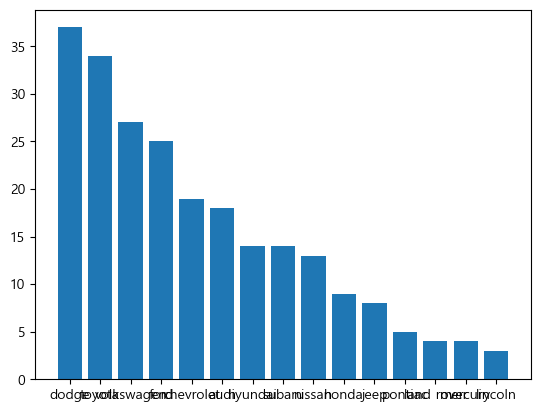

In [29]:
plt.figure()

plt.bar(mpgFrm['manufacturer'].value_counts().index , 
        mpgFrm['manufacturer'].value_counts().values)

plt.show()
plt.close()

In [36]:
print('Q1) 배기량(displ)에 따른 고속연비를 확인하고 한다')
print('배기량 4 이하인 자동차와 5이상인 자동차 중 고속도로 평균연비가 높은지를 확인한다면')

print('case01 - ') 
print(mpgFrm[ mpgFrm['displ'] <= 4 ]['hwy'].mean())
print(mpgFrm[ mpgFrm['displ'] >= 5 ]['hwy'].mean())


Q1) 배기량(displ)에 따른 고속연비를 확인하고 한다
배기량 4 이하인 자동차와 5이상인 자동차 중 고속도로 평균연비가 높은지를 확인한다면
case01 - 
25.96319018404908
18.07894736842105


In [39]:
print('Q2) 자동차 제조사에 따른 도시 연비를 비교할려고 한다')
print('audi , toyota 두 회사의 모든 차종에 대한 도시연비 평균을 비교 - ') 
print(mpgFrm[ mpgFrm['manufacturer'] == 'audi']['cty'].mean())
print(mpgFrm[ mpgFrm['manufacturer'] == 'toyota' ]['cty'].mean())

Q2) 자동차 제조사에 따른 도시 연비를 비교할려고 한다
audi , toyota 두 회사의 모든 차종에 대한 도시연비 평균을 비교 - 
17.61111111111111
18.529411764705884


In [55]:
print('Q3) chevrolet, ford, honda 제조사의 모든 차종에 대한 고속도로 연비 평균을 시각화')

c_idx = (mpgFrm['manufacturer'] == 'chevrolet')
f_idx = (mpgFrm['manufacturer'] == 'ford')
h_idx = (mpgFrm['manufacturer'] == 'honda')

subset = mpgFrm.loc[ c_idx | f_idx | h_idx , : ]
# subset['manufacturer'].unique()
m_series = subset.groupby('manufacturer')['hwy'].mean()

Q3) chevrolet, ford, honda 제조사의 모든 차종에 대한 고속도로 연비 평균을 시각화


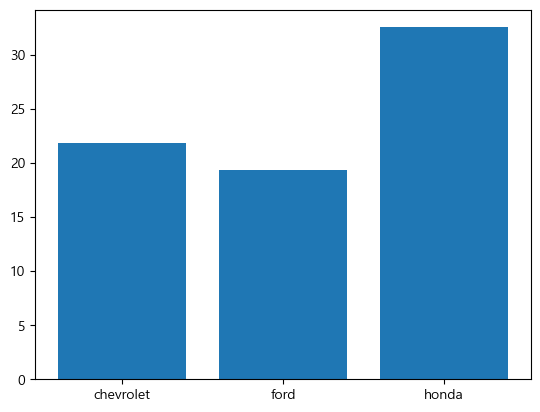

In [56]:
plt.figure()

plt.bar(m_series.index , 
        m_series.values)

plt.show()
plt.close()

In [69]:
print('연료가격(price_fl) 파생변수를 추가할려고 한다 - ') 
print('c : 가스 2.35 , d : 2.38 , e : 2.11 , p : 3.45 , r : 2.22 ')

priceFrm = pd.DataFrame({
    'fl' : ['c','d','e','p','r'] ,
    'price_fl' : [2.35, 2.38, 2.11, 3.45, 2.22]
})
priceFrm

연료가격(price_fl) 파생변수를 추가할려고 한다 - 
c : 가스 2.35 , d : 2.38 , e : 2.11 , p : 3.45 , r : 2.22 


,fl,price_fl
0,c,2.35
1,d,2.38
2,e,2.11
3,p,3.45
4,r,2.22


In [79]:
mpgFrm = pd.merge(mpgFrm , priceFrm, how = 'inner' , on = 'fl')

In [80]:
mpgFrm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  price_fl      234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [81]:
mpgFrm.isnull().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
price_fl        0
dtype: int64

In [82]:
mpgFrm.loc[65 , 'hwy'] = np.NaN
mpgFrm.loc[120 , 'hwy'] = np.NaN
mpgFrm.loc[154 , 'hwy'] = np.NaN
mpgFrm.loc[189 , 'hwy'] = np.NaN
mpgFrm.loc[219 , 'hwy'] = np.NaN
mpgFrm.loc[230 , 'hwy'] = np.NaN

In [88]:
print('isnull , isna - ')
mpgFrm[['drv' , 'hwy']].isna().sum()

isnull , isna - 


drv    0
hwy    6
dtype: int64

In [98]:
print('Q3) hwy 결측값을 제외하고 어떤 구동방식의 고속도로평균 연비가 높은지 확인한다면')
print('dropna - 결측값 제외')
print( mpgFrm.groupby('drv')['hwy'].mean())
print( mpgFrm[['drv' , 'hwy']].dropna().groupby('drv').mean() )

Q3) hwy 결측값을 제외하고 어떤 구동방식의 고속도로평균 연비가 높은지 확인한다면
dropna - 결측값 제외
drv
4    19.174757
f    27.960000
r    21.000000
Name: hwy, dtype: float64
           hwy
drv           
4    19.174757
f    27.960000
r    21.000000


구동방식별 고속도로연비평균을 막대 그래프로 시각화 - 


<Figure size 640x480 with 0 Axes>

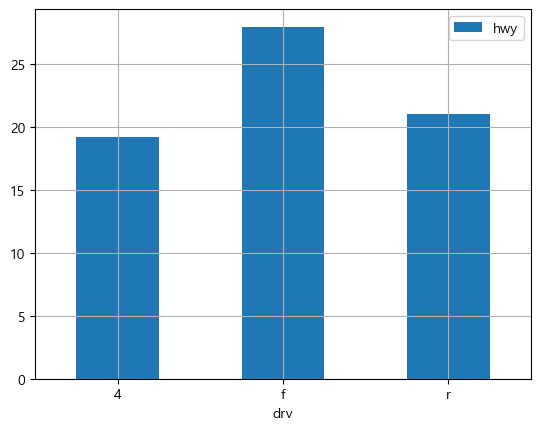

In [105]:
print('구동방식별 고속도로연비평균을 막대 그래프로 시각화 - ')
grpDrvFrm = mpgFrm[['drv' , 'hwy']].dropna().groupby('drv').mean()
# grpDrvFrm

plt.figure()

grpDrvFrm.plot(kind = 'bar' , 
               rot  = 0)
plt.grid()
plt.show()
plt.close()

Q4) 구동방식별 고속도로, 도시연비 평균을 서브셋을 만들고
시각화 - multi bar 


<Figure size 640x480 with 0 Axes>

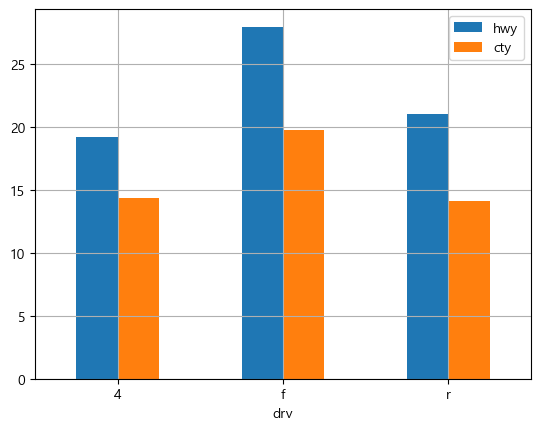

In [111]:
print('Q4) 구동방식별 고속도로, 도시연비 평균을 서브셋을 만들고')
print('시각화 - multi bar ') 

grpDrvFrm = mpgFrm[['drv' , 'hwy' , 'cty']].dropna().groupby('drv').mean()

plt.figure()

grpDrvFrm.plot(kind = 'bar' , 
               rot  = 0)
plt.grid()
plt.show()
plt.close()

Q5) 해당 클래스별 빈도수를 시각화 - 


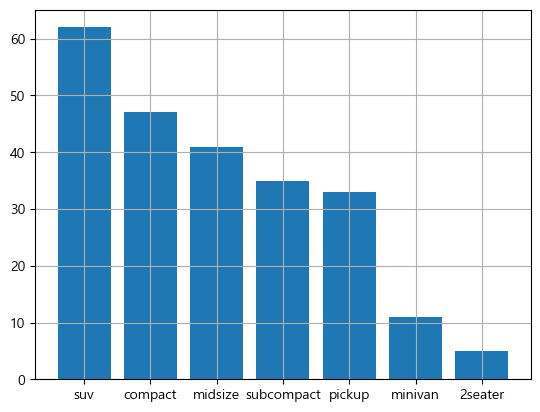

In [117]:
print('Q5) 해당 클래스별 빈도수를 시각화 - ')
# mpgFrm['class'].unique()
mpgFrm['class'].value_counts()

plt.figure()

plt.bar(mpgFrm['class'].value_counts().index , 
        mpgFrm['class'].value_counts().values)
plt.grid()
plt.show()
plt.close()

In [134]:
print('Q6) 제조사별 SUV 도시연비 Top5 시각화 - ')
# mpgFrm['manufacturer'].unique()

# mpgFrm.groupby('manufacturer')['cty'].mean()

subset = mpgFrm[ mpgFrm['class'] == 'suv' ].groupby('manufacturer')[['cty']].mean()
print('type - ' , type(subset))
display(subset)
print()
print()
subset.sort_values(by='cty' , ascending = False , inplace = True)
display(subset.head())


Q6) 제조사별 SUV 도시연비 Top5 시각화 - 
type -  <class 'pandas.core.frame.DataFrame'>


,cty
manufacturer,
chevrolet,12.666667
dodge,11.857143
ford,12.888889
jeep,13.500000
land rover,11.500000
lincoln,11.333333
mercury,13.250000
nissan,13.750000
subaru,18.833333


,cty
manufacturer,
subaru,18.833333
toyota,14.375000
nissan,13.750000
jeep,13.500000
mercury,13.250000


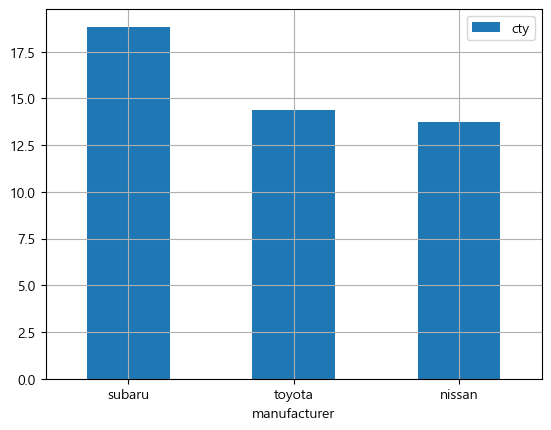

In [138]:
subset.head(3).plot(kind = 'bar' , rot = 0)

plt.grid()
plt.show()
plt.close()


- 이상치 처리 

<Axes: >

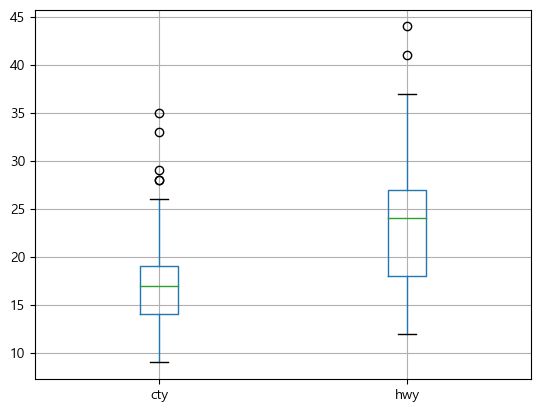

In [142]:
subset = mpgFrm.loc[ :  , ['cty' , 'hwy']]
# subset 
subset.boxplot()

In [148]:
print('IQR - ') 
Q1 = subset.quantile(q=0.25)
Q1

IQR - 


cty    14.0
hwy    18.0
Name: 0.25, dtype: float64

In [149]:
Q3 = subset.quantile(q=0.75)
Q3

cty    19.0
hwy    27.0
Name: 0.75, dtype: float64

In [150]:
IQR = Q3 - Q1 
IQR

cty    5.0
hwy    9.0
dtype: float64

In [154]:
print('lower fence - 최저 한계치')
lower = Q1 - 1.5 * IQR
lower

lower fence - 최저 한계치


cty    6.5
hwy    4.5
dtype: float64

In [155]:
print('upper fence - 최고 한계치')
upper = Q3 + 1.5 * IQR
upper

upper fence - 최고 한계치


cty    26.5
hwy    40.5
dtype: float64

In [162]:
print('lower fence 경계값을 얻어 본다면 - ')
lower_outlier = subset[ subset > lower ].min()
lower_outlier

lower fence 경계값을 얻어 본다면 - 


cty     9.0
hwy    12.0
dtype: float64

In [163]:
print('upper fence 경계값을 얻어 본다면 - ')
upper_outlier = subset[ subset < upper ].max()
upper_outlier

upper fence 경계값을 얻어 본다면 - 


cty    26.0
hwy    37.0
dtype: float64

cty outlier 확인 - 


hwy outlier 확인 - 


In [287]:
cleanFrm = mpgFrm.copy()
cleanFrm[['cty' , 'hwy']].isna().sum()


cty    0
hwy    6
dtype: int64

In [288]:
print('cty outlier 확인 - ') 
cty_outlier = mpgFrm[ mpgFrm['cty'] > upper_outlier['cty'] ]
for idx in cty_outlier.index : 
    cleanFrm.loc[idx , 'cty'] = np.NaN

cty outlier 확인 - 


In [289]:
print('hwy outlier 확인 - ')
hwy_outlier = mpgFrm[ mpgFrm['hwy'] > upper_outlier['hwy'] ]
for idx in hwy_outlier.index : 
    cleanFrm.loc[idx , 'hwy'] = np.NaN

hwy outlier 확인 - 


In [290]:
cleanFrm[['cty' , 'hwy']].isna().sum()
# cleanFrm.isnull().sum()

cty    5
hwy    8
dtype: int64

In [294]:
print('Q6) 결측값을 평균으로 대체 cty , hwy ')
print('이상치 처리 후 구동방식별 도시,고속도로 연비 평균을 시각화 - ') 

cleanFrm.loc[ cleanFrm['cty'] != cleanFrm['cty'] , 'cty'] = cleanFrm['cty'].mean()
cleanFrm.loc[ cleanFrm['hwy'] != cleanFrm['hwy'] , 'hwy'] = cleanFrm['hwy'].mean()


Q6) 결측값을 평균으로 대체 cty , hwy 
이상치 처리 후 구동방식별 도시,고속도로 연비 평균을 시각화 - 


In [295]:
# cleanFrm.loc[119 , : ]
cleanFrm[['cty' , 'hwy']].isnull().sum()


cty    0
hwy    0
dtype: int64

<Axes: >

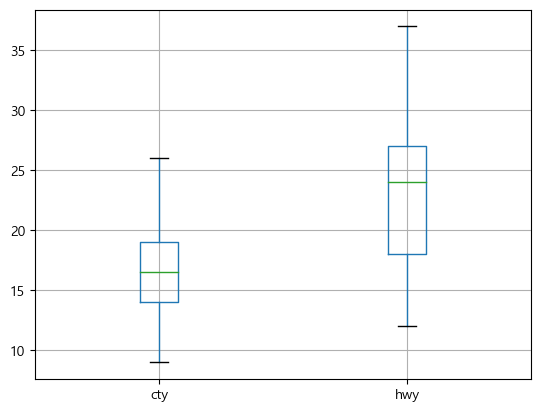

In [296]:
subset = cleanFrm.loc[ :  , ['cty' , 'hwy']]
# subset 
subset.boxplot()

<Figure size 640x480 with 0 Axes>

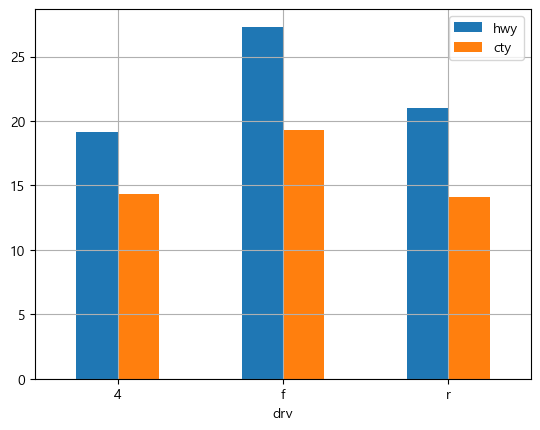

In [298]:
# cleanFrm['drv'].unique()
grpDrvFrm = cleanFrm[['drv' , 'hwy' , 'cty']].groupby('drv').mean()
grpDrvFrm
plt.figure()

grpDrvFrm.plot(kind = 'bar' , 
                rot  = 0)
plt.grid()
plt.show()
plt.close()